<a href="https://colab.research.google.com/github/hawary180318/TugasPertemuan10Phyton/blob/main/Copy_of_Tugas_Besar_Python_Hawary_Siddik_(1101194388).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Tugas Besar Python_Hawary Siddik (1101194388)**


# 1. Perhitungan Daya Terima

In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
def cos(frek,tipe,ht,hr,d):
    if frek in range(150,1501):
        Ca=69.55
        Cb=26.16
    elif frek in range(1501,2001):
        Ca=46.3
        Cb=33.9
    
    if tipe=='urban' :
        Cm=0
    elif tipe=='suburban' :
        Cm= -2*((np.log10((frek/28)**2))-5.4)
    elif tipe=='open' :
        Cm= -4.78*(np.log10(frek))+18.33*(np.log10(frek))-40.94
    else :
        Cm='tipe salah'
    
    ahr = (1.1*np.log10(frek)-0.7)*hr-(1.56*np.log10(frek)-1.8)
    Lp = Ca+(Cb*np.log10(frek))-(13.83*np.log(ht))-ahr+((44.9-6.55*np.log10(ht))*np.log10(d))-Cm
    
    return Lp

In [3]:
f=1800 #MHz
loc1='urban'
loc2='suburban'
loc3='open'
tower=80 #m
user=1.5 #m
dmin=200 #m
dmax=700 #m 
Ptx= 30000 #miliwatt
Gtx= 10 #db
Grx= 2 #db
N=200 #titik
d=np.random.randint(dmin,dmax,N)

In [4]:
NtL = lambda x : 10*np.log10(x) #numerik(watt) ke logaritmik(dB)
LtN = lambda x : 10**(x/10) #logaritmik(dB) ke numerik(watt)

In [5]:
Ptx_convert= NtL(Ptx) #ubah daya pengirim ke bentuk logaritmik (dB)

In [6]:
def Prx(ptx,PL,gain_tr,gain_rv):
    Ptx_convert= NtL(ptx) 
    prx = Ptx_convert - (PL + gain_tr + gain_rv)
    Prx_convert= LtN(prx) #ubah daya terima ke bentuk numerik (miliWatt)

    return Prx_convert # miliwatt

# Grafik 1- Frekuensi 1800 Mhz

In [7]:
LpUrban=cos(f,loc1,tower,user,d)
LpSuburban=cos(f,loc2,tower,user,d)
LpOpen=cos(f,loc3,tower,user,d)

In [8]:
#nilai Prx tiap kawasan dalam miliwatt
Prx_Urban=Prx(Ptx_convert,LpUrban,Gtx,Grx )
Prx_Suburban=Prx(Ptx_convert,LpSuburban,Gtx,Grx)
Prx_Open=Prx(Ptx_convert,LpOpen,Gtx,Grx)

In [9]:
d_sort=d[np.argsort(d)]
Urban_sort=Prx_Urban[np.argsort(d)]
Suburban_sort=Prx_Suburban[np.argsort(d)]
Open_sort=Prx_Open[np.argsort(d)]

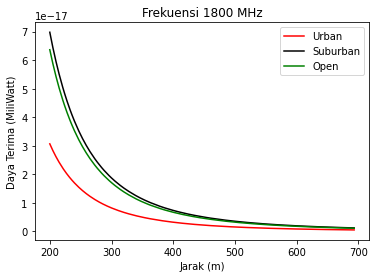

In [11]:
plt.figure()
plt.plot(d_sort,Urban_sort,'r-', label='Urban')
plt.plot(d_sort,Suburban_sort,'k-', label='Suburban')
plt.plot(d_sort,Open_sort,'g-', label='Open')
plt.legend()
plt.title('Frekuensi 1800 MHz')
plt.xlabel('Jarak (m)')
plt.ylabel('Daya Terima (MiliWatt)')
plt.show()


# Grafik 2 - Model Urban

In [12]:
f1=700 #MHz
f2=900 #MHz
f3=1800 #MHz
loc='urban'

# Grafik Model Urban Prx

In [13]:
LpUrban1=cos(f1,loc,tower,user,d)
LpUrban2=cos(f2,loc,tower,user,d)
LpUrban3=cos(f3,loc,tower,user,d)

In [14]:
Prx_Urban1=Prx(Ptx_convert,LpUrban1,Gtx,Grx )
Prx_Urban2=Prx(Ptx_convert,LpUrban2,Gtx,Grx)
Prx_Urban3=Prx(Ptx_convert,LpUrban3,Gtx,Grx)

In [15]:
d_sort=d[np.argsort(d)]
Urban1_sort=Prx_Urban1[np.argsort(d)]
Urban2_sort=Prx_Urban2[np.argsort(d)]
Urban3_sort=Prx_Urban3[np.argsort(d)]

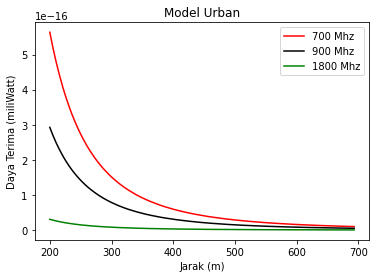

In [16]:
plt.figure()
plt.plot(d_sort,Urban1_sort,'r-', label='700 Mhz')
plt.plot(d_sort,Urban2_sort,'k-', label='900 Mhz')
plt.plot(d_sort,Urban3_sort,'g-', label='1800 Mhz')
plt.legend()
plt.title('Model Urban')
plt.xlabel('Jarak (m)')
plt.ylabel('Daya Terima (miliWatt)')
plt.show()


## **2. Perhitungan** **SNR**

In [17]:
BW= 5000000 #Hz

In [18]:
def snr(Prx, bw):
  noise=-174 + NtL(bw)
  Noise=LtN(noise)
  SNR=Prx/Noise
  return SNR

In [19]:
SNR_Urban=snr(Prx_Urban,BW )
SNR_Suburban=snr(Prx_Suburban,BW)
SNR_Open=snr(Prx_Open,BW)

In [20]:
d_sort=d[np.argsort(d)]
snrUrban_sort=SNR_Urban[np.argsort(d)]
snrSuburban_sort=SNR_Suburban[np.argsort(d)]
snrOpen_sort=SNR_Open[np.argsort(d)]

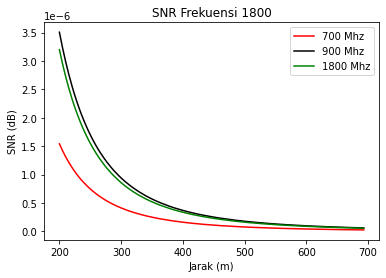

In [21]:
plt.figure()
plt.plot(d_sort,snrUrban_sort,'r-', label='700 Mhz')
plt.plot(d_sort,snrSuburban_sort,'k-', label='900 Mhz')
plt.plot(d_sort,snrOpen_sort,'g-', label='1800 Mhz')
plt.legend()
plt.title('SNR Frekuensi 1800')
plt.xlabel('Jarak (m)')
plt.ylabel('SNR (dB)')
plt.show()

# Grafik 1.2- Frekuensi 1800 Mhz

In [22]:
SNR_Urban1=snr(Prx_Urban1,BW )
SNR_Urban2=snr(Prx_Urban2,BW)
SNR_Urban3=snr(Prx_Urban3,BW)

In [23]:
d_sort=d[np.argsort(d)]
snrUrban1_sort=SNR_Urban1[np.argsort(d)]
snrUrban2_sort=SNR_Urban2[np.argsort(d)]
snrUrban3_sort=SNR_Urban3[np.argsort(d)]

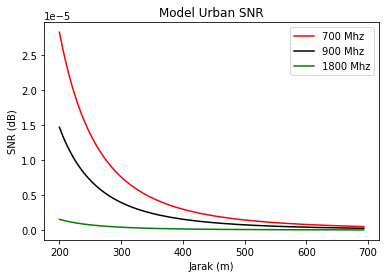

In [24]:
plt.figure()
plt.plot(d_sort,snrUrban1_sort,'r-', label='700 Mhz')
plt.plot(d_sort,snrUrban2_sort,'k-', label='900 Mhz')
plt.plot(d_sort,snrUrban3_sort,'g-', label='1800 Mhz')
plt.legend()
plt.title('Model Urban SNR')
plt.xlabel('Jarak (m)')
plt.ylabel('SNR (dB)')
plt.show()

**3. Perhitungan Capacity**

In [25]:
def C(Snr,Bw):
    capacity= Bw*np.log2(1+Snr)
    return capacity

Grafik 1.3 Frekuensi 1800

In [26]:
C_Urban=C(SNR_Urban,BW)
C_Suburban=C(SNR_Suburban,BW)
C_Open=C(SNR_Open,BW)

In [27]:
d_sort=d[np.argsort(d)]
UrbanC_sort=C_Urban[np.argsort(d)]
SuburbanC_sort=C_Suburban[np.argsort(d)]
OpenC_sort=C_Open[np.argsort(d)]

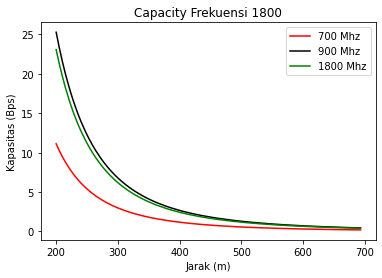

In [28]:
plt.figure()
plt.plot(d_sort,UrbanC_sort,'r-', label='700 Mhz')
plt.plot(d_sort,SuburbanC_sort,'k-', label='900 Mhz')
plt.plot(d_sort,OpenC_sort,'g-', label='1800 Mhz')
plt.legend()
plt.title('Capacity Frekuensi 1800')
plt.xlabel('Jarak (m)')
plt.ylabel('Kapasitas (Bps)')
plt.show()

In [29]:
C_Urban1=C(SNR_Urban1,BW)
C_Urban2=C(SNR_Urban2,BW)
C_Urban3=C(SNR_Urban3,BW)

In [30]:
d_sort=d[np.argsort(d)]
UrbanC1_sort=C_Urban1[np.argsort(d)]
UrbanC2_sort=C_Urban2[np.argsort(d)]
UrbanC3_sort=C_Urban3[np.argsort(d)]

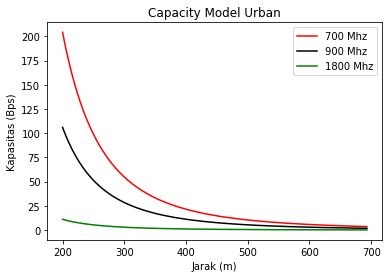

In [31]:
plt.figure()
plt.plot(d_sort,UrbanC1_sort,'r-', label='700 Mhz')
plt.plot(d_sort,UrbanC2_sort,'k-', label='900 Mhz')
plt.plot(d_sort,UrbanC3_sort,'g-', label='1800 Mhz')
plt.legend()
plt.title('Capacity Model Urban')
plt.xlabel('Jarak (m)')
plt.ylabel('Kapasitas (Bps)')
plt.show()